<a href="https://colab.research.google.com/github/solobala/CVML10/blob/main/003_superpixel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SEEDS: Superpixels Extracted via Energy-Driven Sampling

для корректной работы примера необходимо установить пакет opencv-contrib: pip install --upgrade opencv-python opencv-contrib-python

In [4]:
!pip install --upgrade opencv-python opencv-contrib-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.7/61.7 MB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 MB 9.5 MB/s eta 0:00:00
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.8.0.76
    Uninstalling opencv-python-4.8.0.76:
      Successfully uninstalled opencv-python-4.8.0.76
  Attempting uninstall: opencv-contrib-python
    Found existing installation: opencv-contrib-python 4.8.0.76
    Uninstalling opencv-contrib-python-4.8.0.76:
      Successfully uninstalled opencv-contrib-python-4.8.0.76


In [5]:
%matplotlib inline
import cv2
import numpy as np
from cv2 import ximgproc
from matplotlib import pyplot as plt

In [8]:
img = cv2.imread('landscape.jpeg')

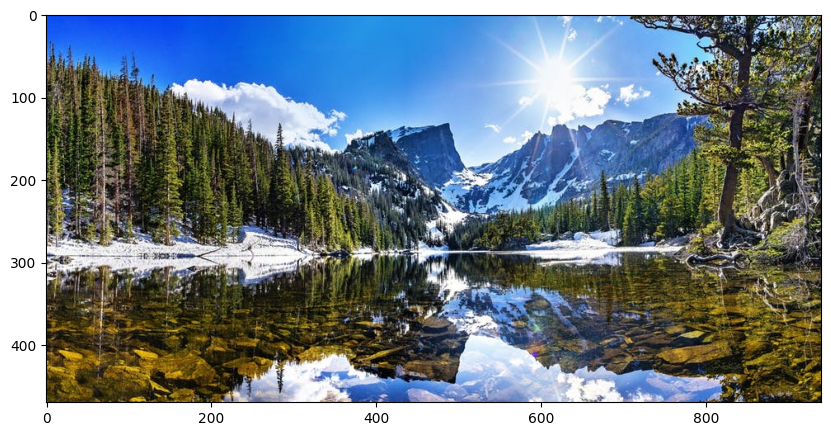

In [9]:
fig = plt.figure(figsize=(10, 8))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB));

In [10]:
seeds = None
display_mode = 0
num_superpixels = 100
prior = 2
num_levels = 4
num_histogram_bins = 5
num_iterations = 1000

# преобразуем пространство цветов
converted_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

height,width,channels = converted_img.shape

# инициализируем алгоритм
seeds = ximgproc.createSuperpixelSEEDS(width, height, channels,
            num_superpixels, num_levels, prior, num_histogram_bins)

# выполняем num_iterations шагов
seeds.iterate(converted_img, num_iterations)

# получаем разметку пикселей
labels = seeds.getLabels()

# получаем маску контуров
mask = seeds.getLabelContourMask(thick_line=False)

# инвертируем маску
mask_inv = cv2.bitwise_not(mask)

# зануляем пикселы исходной картинки на границах
result_bg = cv2.bitwise_and(img, img, mask=mask_inv)

# создаем изображение контуров
color_img = np.zeros((height,width,3), np.uint8)
color_img[:] = (0, 255, 0)
result_fg = cv2.bitwise_and(color_img, color_img, mask=mask)

# совмещаем границы с исходным изображением
result = cv2.add(result_bg, result_fg)

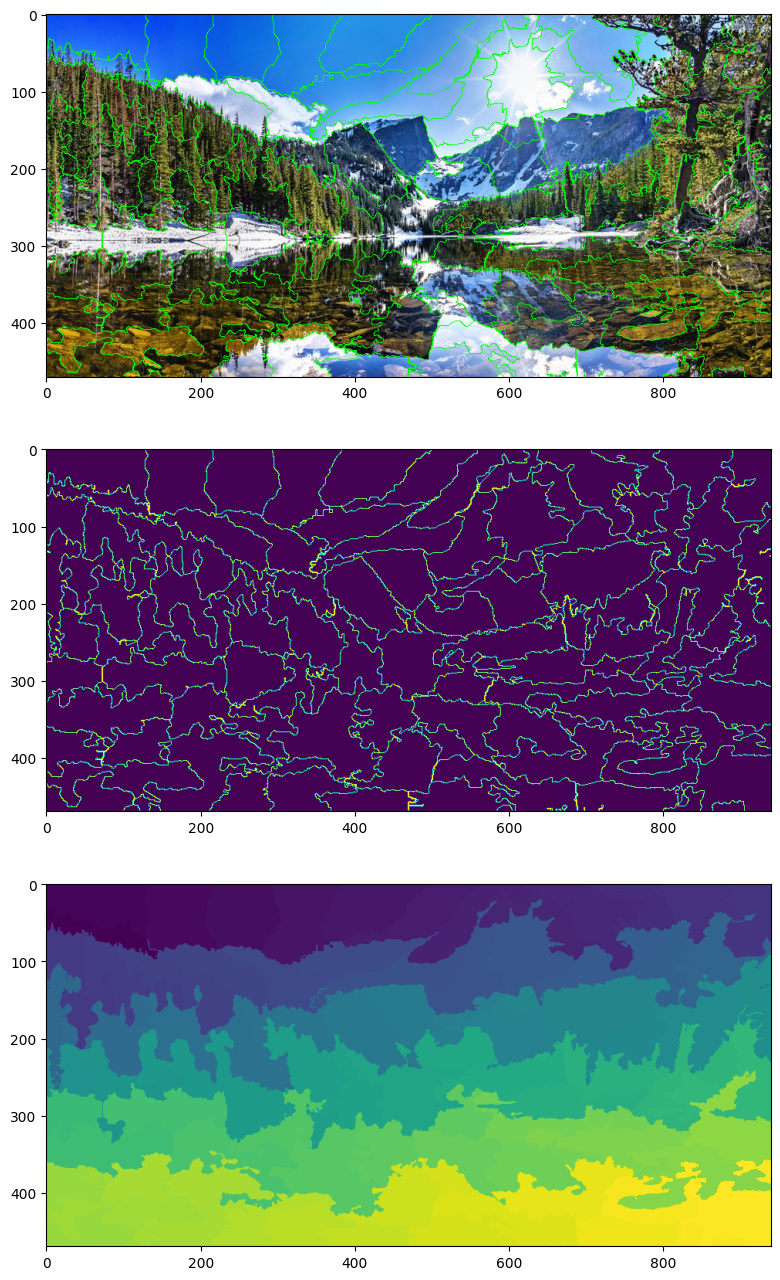

In [11]:
imgs = [cv2.cvtColor(result, cv2.COLOR_BGR2RGB),
        mask, labels]
fig = plt.figure(figsize=(10, 16))
for i, e in enumerate(imgs, 1):
    subplot = fig.add_subplot(3, 1, i)
    plt.imshow(e);